Softmax Function

In [ ]:
import numpy as np

def softmax(z):
    """
    Compute the softmax probabilities for a given input matrix.

    Parameters:
    z (numpy.ndarray): Logits (raw scores) of shape (m, n), where
                       - m is the number of samples.
                       - n is the number of classes.

    Returns:
    numpy.ndarray: Softmax probability matrix of shape (m, n), where
                   each row sums to 1 and represents the probability
                   distribution over classes.

    Notes:
    - The input to softmax is typically computed as: z = XW + b.
    - Uses numerical stabilization by subtracting the max value per row.
    """


    z_stable = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z_stable)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # Example test case
z_test = np.array([[2.0, 1.0, 0.1], [1.0, 1.0, 1.0]])
softmax_output = softmax(z_test)

# Verify if the sum of probabilities for each row is 1 using assert
row_sums = np.sum(softmax_output, axis=1)

# Assert that the sum of each row is 1
assert np.allclose(row_sums, 1), f"Test failed: Row sums are {row_sums}"

print("Softmax function passed the test case!")

Softmax function passed the test case!


Prediction Function

In [ ]:
def predict_softmax(X, W, b):
    """
    Predict the class labels for a set of samples using the trained softmax model.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    W (numpy.ndarray): Weight matrix of shape (d, c), where c is the number of classes.
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    numpy.ndarray: Predicted class labels of shape (n,), where each value is the index of the predicted class.
    """
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    predicted_classes = np.argmax(y_pred, axis=1)
    return predicted_classes

    # Define test case
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])  # Feature matrix (3 samples, 2 features)
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])  # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3])  # Bias (3 classes)

# Expected Output:
# The function should return an array with class labels (0, 1, or 2)

y_pred_test = predict_softmax(X_test, W_test, b_test)

# Validate output shape
assert y_pred_test.shape == (3,), f"Test failed: Expected shape (3,), got {y_pred_test.shape}"

# Print the predicted labels
print("Predicted class labels:", y_pred_test)

Predicted class labels: [1 1 0]


Loss Function

In [ ]:
import numpy as np
def loss_softmax(y_pred,y):
    loss = -np.sum(y * np.log(y_pred + 1e-15))
    return

Cost Function

In [ ]:
import numpy as np

def cost_softmax(X, y, W, b):
    """
    Compute the average softmax regression cost (cross-entropy loss) over all samples using a loop.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c), where n is the number of samples and c is the number of classes.
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    float: Average softmax cost (cross-entropy loss) over all samples.
    """

    n = X.shape[0]
    z= np.dot(X, W)+b
    y_pred=softmax(z)
    total_loss = np.sum([loss_softmax(y_pred[i],y[i]) for i in range(n)])

    # Return average loss
    return total_loss / n


Computing Gradients

In [ ]:
def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    tuple: Gradients with respect to weights (d, c) and biases (c,).
    """
    n = X.shape[0]
    z = np.dot(X, W)+b
    y_pred=softmax(z)

    grad_y = y_pred -y
    grad_W = np.dot(X.T, grad_y)/n
    grad_b = np.sum(grad_y, axis=0)/n


    return grad_W, grad_b

Test case for compute_gradient function

In [ ]:
import numpy as np

# Define a simple feature matrix and true labels
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])  # Feature matrix (3 samples, 2 features)
y_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # True labels (one-hot encoded, 3 classes)

# Define weight matrix and bias vector
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])  # Weights (2 features, 3 classes)
b_test = np.array([0.1, 0.2, 0.3])  # Bias (3 classes)

# Compute the gradients using the function
grad_W, grad_b = compute_gradient_softmax(X_test, y_test, W_test, b_test)

# Manually compute the predicted probabilities (using softmax function)
z_test = np.dot(X_test, W_test) + b_test
y_pred_test = softmax(z_test)

# Compute the manually computed gradients
grad_W_manual = np.dot(X_test.T, (y_pred_test - y_test)) / X_test.shape[0]
grad_b_manual = np.sum(y_pred_test - y_test, axis=0) / X_test.shape[0]

# Assert that the gradients computed by the function match the manually computed gradients
assert np.allclose(grad_W, grad_W_manual), f"Test failed: Gradients w.r.t. W are not equal.\nExpected: {grad_W_manual}\nGot: {grad_W}"
assert np.allclose(grad_b, grad_b_manual), f"Test failed: Gradients w.r.t. b are not equal.\nExpected: {grad_b_manual}\nGot: {grad_b}"

# Print the gradients for verification
print("Gradient w.r.t. W:", grad_W)
print("Gradient w.r.t. b:", grad_b)

print("Test passed!")


Gradient w.r.t. W: [[ 0.1031051   0.01805685 -0.12116196]
 [-0.13600547  0.00679023  0.12921524]]
Gradient w.r.t. b: [-0.03290036  0.02484708  0.00805328]
Test passed!


Implementing Gradient Descent

In [ ]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    alpha (float): Learning rate.
    n_iter (int): Number of iterations.
    show_cost (bool): Whether to display the cost at intervals.

    Returns:
    tuple: Optimized weights, biases, and cost history.
    """
    cost_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W-=alpha*grad_W
        W-=alpha*grad_b
    return W, b, cost_history


Preparing Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    """
    Reads the MNIST CSV file, splits data into train/test sets, and plots one image per class.

    Arguments:
    csv_file (str)       : Path to the CSV file containing MNIST data.
    test_size (float)    : Proportion of the data to use as the test set (default: 0.2).
    random_state (int)   : Random seed for reproducibility (default: 42).

    Returns:
    X_train, X_test, y_train, y_test : Split dataset.
    """

    # Load dataset
    df = pd.read_csv("/content/drive/MyDrive/AI and ML/mnist_dataset (1).csv")

    # Separate labels and features
    y = df.iloc[:, 0].values  # First column is the label
    X = df.iloc[:, 1:].values  # Remaining columns are pixel values

    # Normalize pixel values (optional but recommended)
    X = X / 255.0  # Scale values between 0 and 1

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Plot one sample image per class
    plot_sample_images(X, y)

    return X_train, X_test, y_train, y_test

def plot_sample_images(X, y):
    """
    Plots one sample image for each digit class (0-9).

    Arguments:
    X (np.ndarray): Feature matrix containing pixel values.
    y (np.ndarray): Labels corresponding to images.
    """

    plt.figure(figsize=(10, 4))
    unique_classes = np.unique(y)  # Get unique class labels

    for i, digit in enumerate(unique_classes):
        index = np.where(y == digit)[0][0]  # Find first occurrence of the class
        image = X[index].reshape(28, 28)  # Reshape 1D array to 28x28

        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


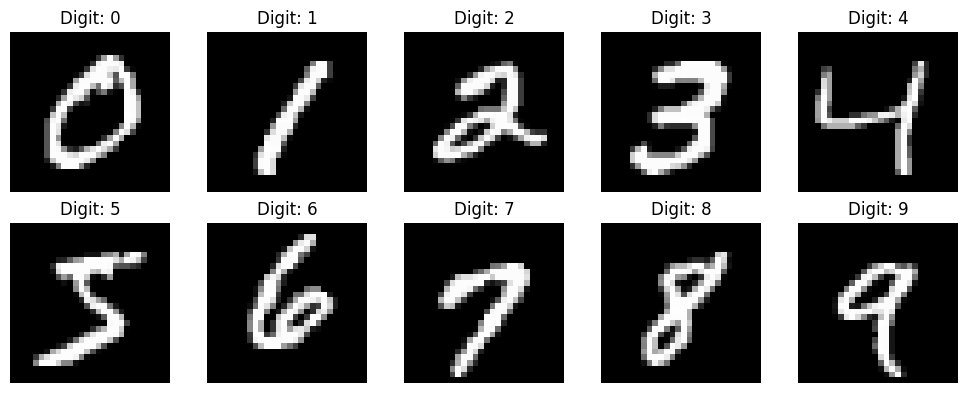

In [ ]:
csv_file_path = "/content/drive/MyDrive/AI and ML/mnist_dataset (1).csv"
X_train, X_test, y_train, y_test = load_and_prepare_mnist(csv_file_path)

A Quick debugging Step:

In [ ]:
# Assert that X and y have matching lengths
assert len(X_train) == len(y_train), f"Error: X and y have different lengths! X={len(X_train)}, y={len(y_train)}"
print("Move forward: Dimension of Feture Matrix X and label vector y matched.")

Move forward: Dimension of Feture Matrix X and label vector y matched.


In [ ]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (48000, 784)
Test data shape: (12000, 784)


Train the Model:

Iteration 0: Cost = 2.327329
Iteration 100: Cost = 0.610806
Iteration 200: Cost = 0.491007
Iteration 300: Cost = 0.441863
Iteration 400: Cost = 0.413538
Iteration 500: Cost = 0.394529
Iteration 600: Cost = 0.380614
Iteration 700: Cost = 0.369841
Iteration 800: Cost = 0.361168
Iteration 900: Cost = 0.353980
Iteration 999: Cost = 0.347947


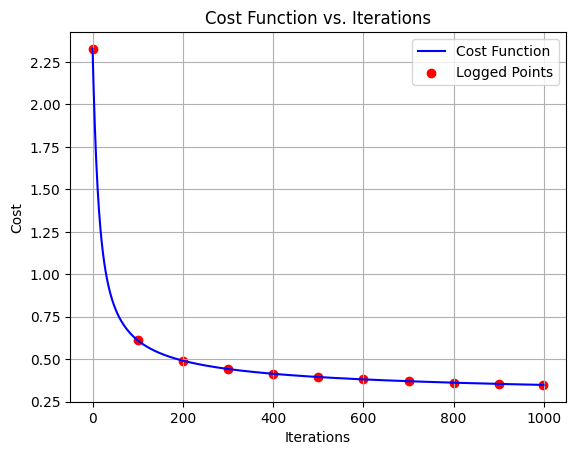

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Ensure y_train is one-hot encoded
if len(y_train.shape) == 1:
    encoder = OneHotEncoder(sparse_output=False)
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test = encoder.transform(y_test.reshape(-1, 1))

# Get input dimension (features) and output dimension (classes)
d = X_train.shape[1]  # Number of features
c = y_train.shape[1]  # Number of classes

# Initialize weights and biases
np.random.seed(42)  # For reproducibility
W = np.random.randn(d, c) * 0.01  # Small random weights
b = np.zeros(c)  # Bias initialized to zero

# Hyperparameters
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def compute_cost(y_true, y_pred):
    m = y_true.shape[0]
    cost = -np.sum(y_true * np.log(y_pred + 1e-8)) / m  # Adding epsilon for numerical stability
    return cost

def gradient_descent_softmax(X, y, W, b, alpha, n_iter):
    m = X.shape[0]  # Number of samples
    cost_history = []
    iter_history = []  # Store iterations where cost is logged

    for i in range(n_iter):
        # Forward propagation
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)

        # Compute cost
        cost = compute_cost(y, y_pred)
        cost_history.append(cost)

        # Print cost and store iteration number every 100 iterations
        if i % 100 == 0 or i == n_iter - 1:
            print(f"Iteration {i}: Cost = {cost:.6f}")
            iter_history.append(i)

        # Backpropagation
        dW = np.dot(X.T, (y_pred - y)) / m
        db = np.sum(y_pred - y, axis=0) / m

        # Update weights
        W -= alpha * dW
        b -= alpha * db

    return W, b, cost_history, iter_history

# Train model
W_opt, b_opt, cost_history, iter_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter)

# Plot cost function with markers at logged points
plt.plot(range(n_iter), cost_history, label="Cost Function", color='b')
plt.scatter(iter_history, [cost_history[i] for i in iter_history], color='r', marker='o', label="Logged Points")

# Labels and title
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()


Evaluating the Model:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Evaluation Function
def evaluate_classification(y_true, y_pred):
    """
    Evaluate classification performance using confusion matrix, precision, recall, and F1-score.

    Parameters:
    y_true (numpy.ndarray): True labels
    y_pred (numpy.ndarray): Predicted labels

    Returns:
    tuple: Confusion matrix, precision, recall, F1 score
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Compute precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return cm, precision, recall, f1



Confusion Matrix:
[[1124    0    7    1    4   13    8    3   12    3]
 [   0 1271    7    9    1    5    1    4   23    1]
 [   1   24 1022   14   19    7   27   25   29    6]
 [   9    5   36 1048    1   54    8   10   29   19]
 [   1    5    7    1 1091    1   11    4    4   51]
 [  21   18   13   41   12  930   10    6   40   13]
 [   8    3    9    1    9   15 1118    4   10    0]
 [   7   28   23    3   15    3    0 1181    7   32]
 [   8   23   16   43    9   45   11    8  983   14]
 [  10    5   11   16   44   10    0   39    9 1050]]
Precision: 0.90
Recall: 0.90
F1-Score: 0.90


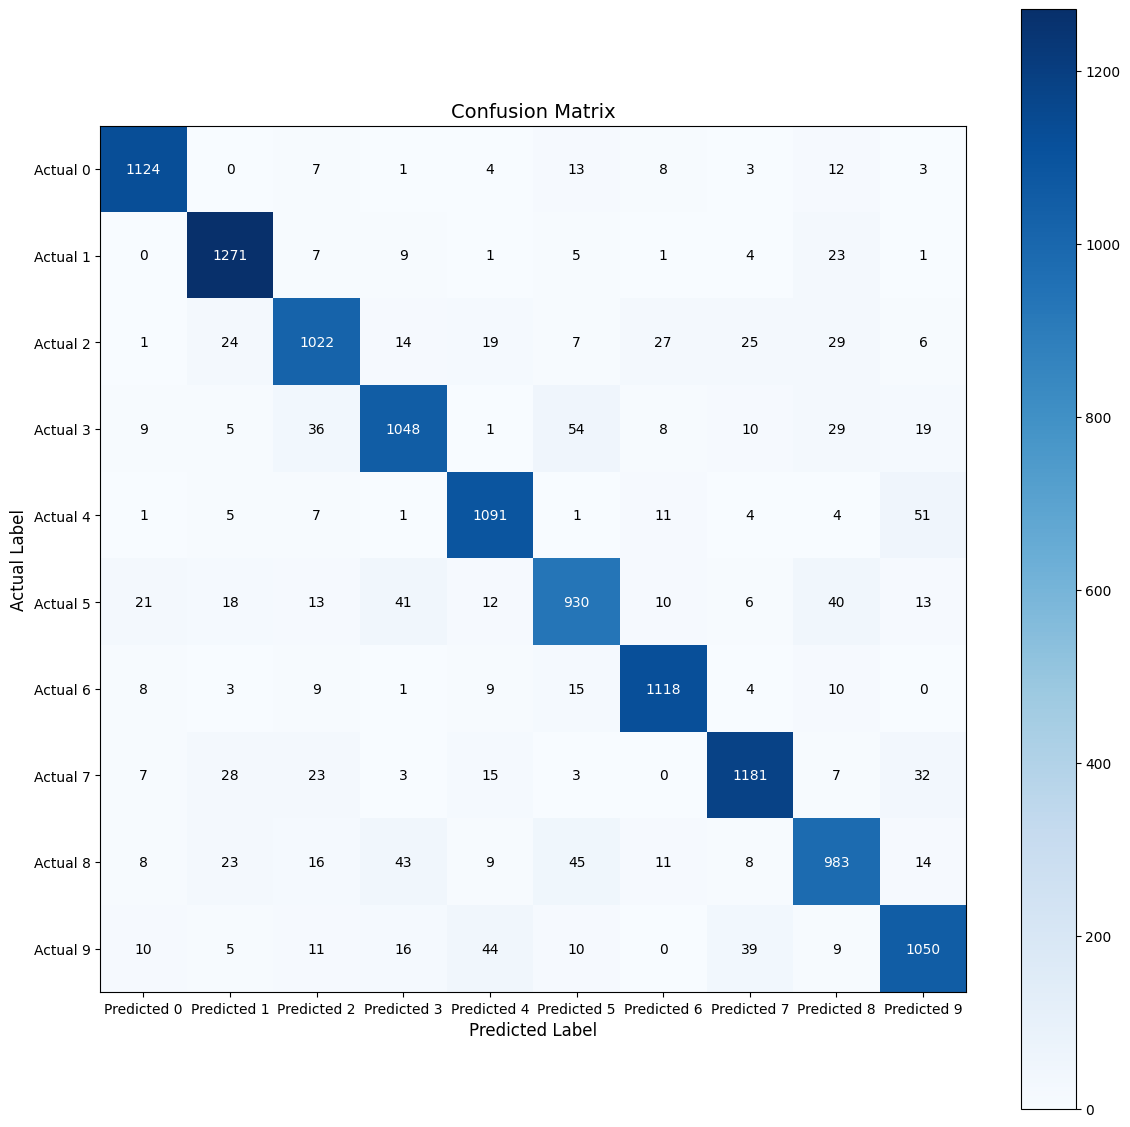

In [ ]:
# Predict on the test set
y_pred_test = predict_softmax(X_test, W_opt, b_opt)

# Evaluate accuracy
y_test_labels = np.argmax(y_test, axis=1)  # True labels in numeric form

# Evaluate the model
cm, precision, recall, f1 = evaluate_classification(y_test_labels, y_pred_test)

# Print the evaluation metrics
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualizing the Confusion Matrix
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.imshow(cm, cmap='Blues')  # Use a color map for better visualization

# Dynamic number of classes
num_classes = cm.shape[0]
ax.set_xticks(range(num_classes))
ax.set_yticks(range(num_classes))
ax.set_xticklabels([f'Predicted {i}' for i in range(num_classes)])
ax.set_yticklabels([f'Actual {i}' for i in range(num_classes)])

# Add labels to each cell in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

# Add grid lines and axis labels
ax.grid(False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.colorbar(cax)
plt.show()
